# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [46]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [2]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()

The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [14]:
df0 = pd.read_csv("power_demand_vs_temperature.csv", index_col=0)
df0.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [15]:
df0.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [20]:
nans = df0.isna().sum()
print("The dataset has {} invalid rows".format(nans.sum()))

The dataset has 0 invalid rows


### Create X and y 

In [24]:
X = df0[["temp"]]
y = df0["demand"]

print("X has shape", X.shape)
print("y has shape", y.shape)

X has shape (1096, 1)
y has shape (1096,)


### Plot the distribution



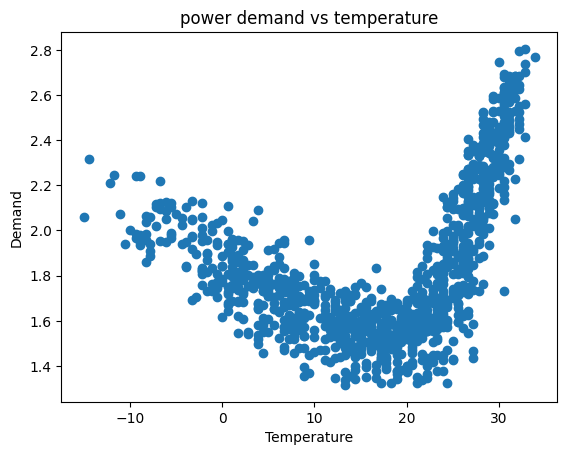

In [25]:
plt.figure()
plt.scatter(X, y)
plt.title("power demand vs temperature")
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.show()

### Divide the dataset in train and test splits

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7)
print(f"Training set and test set have {y_train.shape[0]} and {y_test.shape[0]} elements respectively")

Training set and test set have 767 and 329 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [36]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    # f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p


def eval(X, y, model):
    """
    Takes the fitted model, and the test dataset X with labels y.
    Returns the evaluated rmse, r2 score, f-statistic and p-value
    """
    pred = model.predict(X)
    rmse = mean_squared_error(y, pred, squared= False)
    r2 = r2_score(y, pred)
    f, p = f_test(y, pred, X.shape[1], X.shape[0])
    print("Mean squared error:\t", rmse)
    print("r2 score:\t\t", r2)
    print("f-statistic:\t\t", f)
    print("p-value:\t\t", p)
    return rmse, r2, f, p

## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [40]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

metrics_1 = eval(X= X_test, y= y_test, model= model_1)

# pd.DataFrame({"Metric": ["Mean squared error", "r2 score", "f-statistic", "p-value"], "Value": list(metrics_1)})
pd.DataFrame({"Value": list(metrics_1)}, index= ["Mean squared error", "r2 score", "f-statistic", "p-value"])

Mean squared error:	 0.3142896778667702
r2 score:		 0.17575552207406997
f-statistic:		 38.76696385317004
p-value:		 1.4649726987059353e-09


,Value
Mean squared error,3.142897e-01
r2 score,1.757555e-01
f-statistic,3.876696e+01
p-value,1.464973e-09


#### Visualize the prediction of the model 

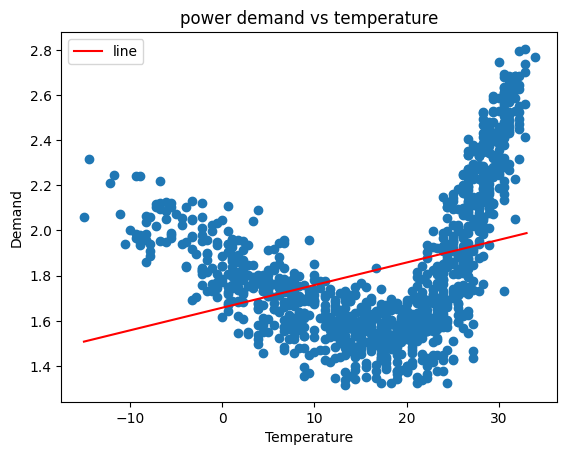

In [55]:
# regression line
XX = np.arange(np.min(X.temp), np.max(X.temp))
yy = model_1.predict(XX.reshape(-1,1))
plt.figure()
plt.scatter(X, y)
plt.plot(XX, yy, "-", label= "line", color= "red")
plt.title("power demand vs temperature")
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.legend()
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn function _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [49]:
pol_features = PolynomialFeatures(degree= 2, include_bias= False)
# [x11 x12]       [1 x11 x12 x11**2 x11*x12 x12**2]
# [x21 x22] --->  [1 x21 x22 x21**2 x12*x22 x22**2] (with bias)

X_pol2 = pol_features.fit_transform(X_train)
model_2 = LinearRegression()
model_2.fit(X_pol2, y_train)

LinearRegression()

In [51]:
metrics_2 = eval(pol_features.transform(X_test), y_test, model_2)

Mean squared error:	 0.17532649343217607
r2 score:		 0.7434979122034886
f-statistic:		 390.21240452745303
p-value:		 1.1102230246251565e-16


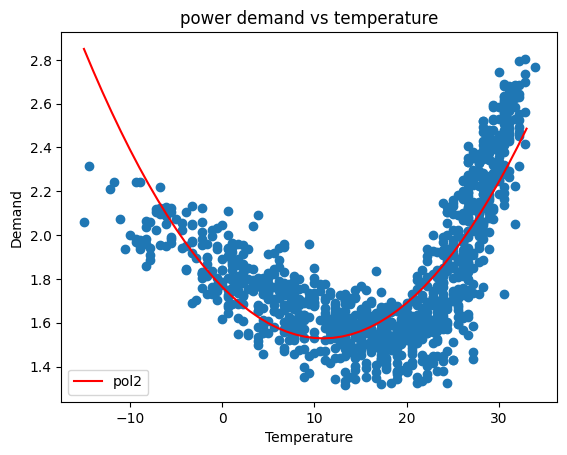

In [56]:
# regression line
XX = np.arange(np.min(X.temp), np.max(X.temp))
yy = model_2.predict(pol_features.transform(XX.reshape(-1,1)))
plt.figure()
plt.scatter(X, y)
plt.plot(XX, yy, "-", label= "pol2", color= "red")
plt.title("power demand vs temperature")
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.legend()
plt.show()

## Third experiment

#### Polynomial degree = 3

In [57]:
pol_features = PolynomialFeatures(degree= 3, include_bias= False)

X_pol3 = pol_features.fit_transform(X_train)
model_3 = LinearRegression()
model_3.fit(X_pol3, y_train)

LinearRegression()

In [58]:
metrics_3 = eval(pol_features.transform(X_test), y_test, model_3)

Mean squared error:	 0.1388840681480556
r2 score:		 0.8390464095667324
f-statistic:		 508.63347567333034
p-value:		 1.1102230246251565e-16


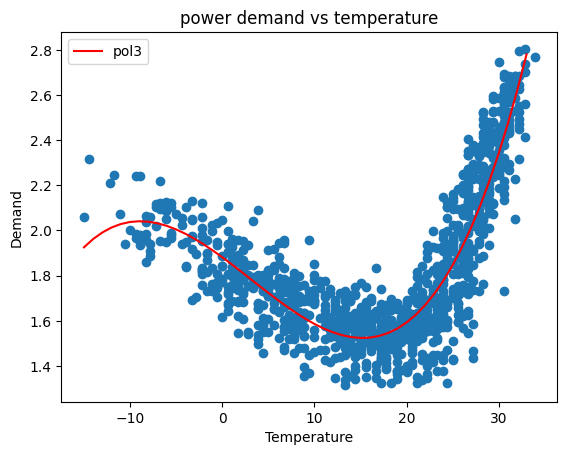

In [59]:
# regression line
XX = np.arange(np.min(X.temp), np.max(X.temp))
yy = model_3.predict(pol_features.transform(XX.reshape(-1,1)))
plt.figure()
plt.scatter(X, y)
plt.plot(XX, yy, "-", label= "pol3", color= "red")
plt.title("power demand vs temperature")
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.legend()
plt.show()

## Fourth experiment
### Polynomial degree = 4

In [60]:
pol_features = PolynomialFeatures(degree= 3, include_bias= False)

X_pol4 = pol_features.fit_transform(X_train)
model_4 = LinearRegression()
model_4.fit(X_pol4, y_train)

LinearRegression()

In [61]:
metrics_4 = eval(pol_features.transform(X_test), y_test, model_3)

Mean squared error:	 0.1388840681480556
r2 score:		 0.8390464095667324
f-statistic:		 508.63347567333034
p-value:		 1.1102230246251565e-16


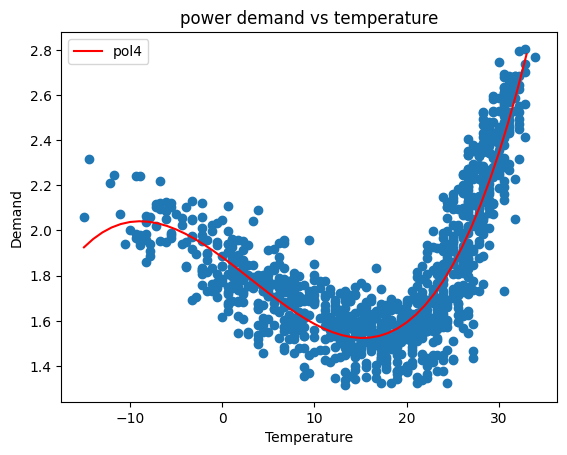

In [62]:
# regression line
XX = np.arange(np.min(X.temp), np.max(X.temp))
yy = model_4.predict(pol_features.transform(XX.reshape(-1,1)))
plt.figure()
plt.scatter(X, y)
plt.plot(XX, yy, "-", label= "pol4", color= "red")
plt.title("power demand vs temperature")
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.legend()
plt.show()

## Compare the performance of the four models

In [63]:
pd.DataFrame({"linear": metrics_1, "polynomial d = 2": metrics_2, "polynomial d = 3": metrics_3, "polynomial d = 4": metrics_4}, index= ["Mean squared error", "r2 score", "f-statistic", "p-value"])

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
Mean squared error,3.142897e-01,1.753265e-01,1.388841e-01,1.388841e-01
r2 score,1.757555e-01,7.434979e-01,8.390464e-01,8.390464e-01
f-statistic,3.876696e+01,3.902124e+02,5.086335e+02,5.086335e+02
p-value,1.464973e-09,1.110223e-16,1.110223e-16,1.110223e-16
